## Cluster Analysis

### K-Means Clustering Algorithm

Let's apply **K-Means clustering** algorithm for the following data:

*  Base features
*  Thereshold features ( top 20 items)
*  PCA (125 components)

In [1]:
# print_function for compatibility with Python 3

from __future__ import print_function
print('Print is ready to serve.')

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd


# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

Print is ready to serve.


In [2]:
# Scikit-Learn's make_pipeline function
from sklearn.pipeline import make_pipeline

# Scikit-Learn's StandardScaler
from sklearn.preprocessing import StandardScaler

# Scikit-Learn's KMeans algorithm (added later)

from sklearn.cluster import KMeans

In [3]:
# Import analytical base table
base_df = pd.read_csv('./analytical_base_table.csv', index_col=0)

# Import thresholded item features
threshold_item_data = pd.read_csv('./threshold_item_data.csv', index_col=0)

# Import PCA item features
pca_item_data = pd.read_csv('./pca_item_data.csv', index_col=0)

In [4]:
# Print shape of each dataframe
print(base_df.shape)
print(threshold_item_data.shape)
print(pca_item_data.shape)

(414, 8)
(414, 20)
(414, 125)


In [5]:
print(base_df.columns)

Index([u'total_transactions', u'total_products', u'total_unique_products',
       u'avg_product_value', u'total_sales', u'min_cart_value',
       u'max_cart_value', u'avg_cart_value'],
      dtype='object')


In [6]:
print(threshold_item_data.columns)

Index([u'22961', u'22630', u'22139', u'21080', u'85099B', u'20726', u'20719',
       u'20750', u'23084', u'20725', u'21212', u'22551', u'22629', u'22328',
       u'21731', u'22556', u'22554', u'22423', u'22326', u'POST'],
      dtype='object')


## Combine base_df and threshold_item_data

In [7]:
# Join base_df with threshold_item_data
threshold_df = base_df.join([threshold_item_data])

# Display first 5 rows of threshold_df
threshold_df.head(5)

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,22961,22630,...,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,5.0


## Combine base_df with pca_item_data

In [8]:
# Join base_df with pca_item_data

pca_df = base_df.join([pca_item_data])
# Display first 5 rows of pca_df
pca_df.head(5)

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,PC1,PC2,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,5.876139,4.828924,...,0.472311,0.548480,0.667170,0.511332,-0.094969,-0.862805,-0.004349,-0.796604,0.387505,0.012323
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,-4.219841,1.226207,...,-0.811850,-0.026329,1.095149,-0.151482,-1.715995,1.567254,-0.589702,1.729490,1.032749,-0.936084
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,-1.260832,2.387579,...,-1.344314,-1.834498,-0.554079,-4.364331,1.855118,-4.038638,-3.334203,0.096984,3.138745,3.946934
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,-4.929321,-0.714915,...,0.216627,0.521099,-0.340818,-1.734804,0.702641,-0.403931,-0.901435,-1.777776,0.868563,-2.465347
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,-2.053103,2.110988,...,13.010588,1.807302,-8.157644,1.997146,-3.438207,-3.359599,2.474139,-2.869258,-2.433634,2.119958


## K Means with Base_df

In [9]:
# First 5 observations of base_df
base_df.head(5)

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value
CustomerID,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000


In [10]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [11]:
# Fit K-Means pipeline
k_means.fit(base_df)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

## Identify the cluster for each entry

In [12]:
# Save clusters to base_df
base_df['cluster'] = k_means.predict(base_df)

# Display first 5 rows of base_df
base_df.head(5)

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,1
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,0
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,0
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,0
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,0


In [13]:
base_df[['cluster']].head(10)

,cluster
CustomerID,
12347,1
12348,0
12349,0
12350,0
12352,0
12353,0
12354,0
12355,0
12356,0


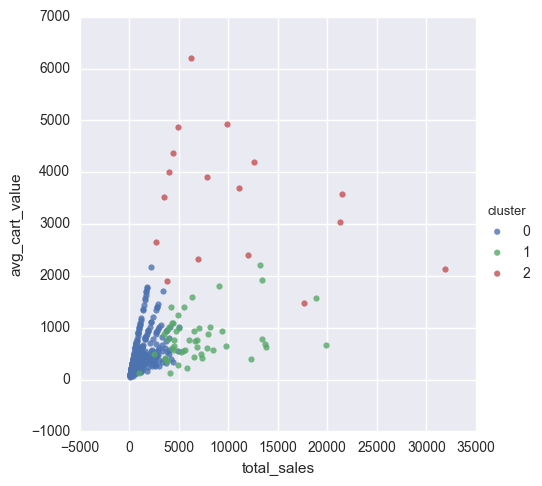

In [14]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', data=base_df, hue='cluster', fit_reg=False)

## Now, find out the cluster for threshold_df

In [15]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [16]:
# Fit K-Means pipeline
k_means.fit(threshold_df)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [17]:
# Save clusters to threshold_df
threshold_df['cluster'] = k_means.predict(threshold_df)

# Display first 5 rows of threshold_df
threshold_df.head(5)

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,22961,22630,...,22551,22629,22328,21731,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,5.0,2


In [18]:
threshold_df.cluster.head(5)

CustomerID
12347    0
12348    2
12349    2
12350    2
12352    2
Name: cluster, dtype: int32

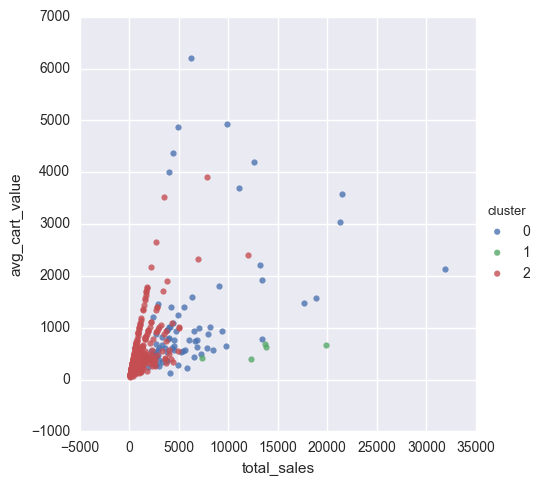

In [19]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', data=threshold_df, hue='cluster', fit_reg=False)

## K Means for PCA dataframe

In [20]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [21]:
# Fit K-Means pipeline
k_means.fit(pca_df)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [22]:
# Save clusters to pca_df
pca_df['cluster'] = k_means.predict(pca_df)

# Display first 5 rows of pca_df
pca_df.head(5)

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,PC1,PC2,...,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,5.876139,4.828924,...,0.548480,0.667170,0.511332,-0.094969,-0.862805,-0.004349,-0.796604,0.387505,0.012323,0
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,-4.219841,1.226207,...,-0.026329,1.095149,-0.151482,-1.715995,1.567254,-0.589702,1.729490,1.032749,-0.936084,0
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,-1.260832,2.387579,...,-1.834498,-0.554079,-4.364331,1.855118,-4.038638,-3.334203,0.096984,3.138745,3.946934,0
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,-4.929321,-0.714915,...,0.521099,-0.340818,-1.734804,0.702641,-0.403931,-0.901435,-1.777776,0.868563,-2.465347,0
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,-2.053103,2.110988,...,1.807302,-8.157644,1.997146,-3.438207,-3.359599,2.474139,-2.869258,-2.433634,2.119958,0


In [23]:
pca_df.cluster.head(10)

CustomerID
12347    0
12348    0
12349    0
12350    0
12352    0
12353    0
12354    0
12355    0
12356    0
12357    2
Name: cluster, dtype: int32

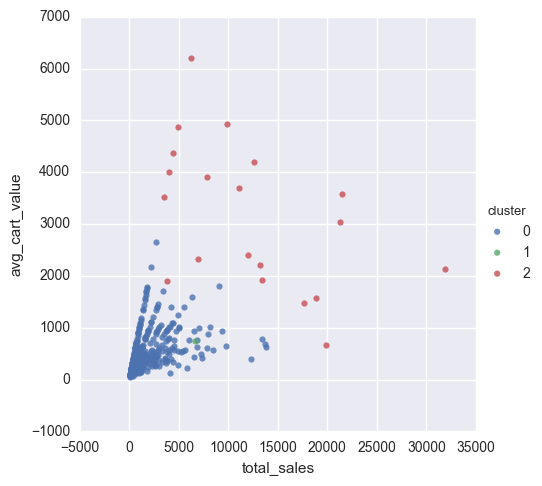

In [24]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', data=pca_df, hue='cluster', fit_reg=False)

## Model Comparison

In [25]:
# Check all indices are identical
print( all( base_df.index == threshold_df.index ) )
print( all( base_df.index == pca_df.index) )

True
True


In [26]:
# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score

In [27]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.60213549517823428

In [28]:
# Similary between base_df.cluster and pca_df.cluster
adjusted_rand_score(base_df.cluster, pca_df.cluster)

0.40522220474779586